In [2]:
'''
Shiyang Zhang
January 20, 2023
Generate wordcloud for DEWS newsletter
'''

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import csv

# Settings
comment_words = ""
stopwords = set(STOPWORDS)
stopwords.add("oh")
stopwords.add("eh")
stopwords.add("yeah")
stopwords.add("â")
stopwords.add("uh")
stopwords.add("um")
stopwords.add("well")
stopwords.add("mm")
stopwords.add("hm")
stopwords.add("mhm")
stopwords.add("ah")
stopwords.add("xxx")
stopwords.add("thatâ")
stopwords.add("donâ")
stopwords.add("huh")
stopwords.add("s")
stopwords.add("t")

In [4]:
# Import .txt documents
filename = r"C:\Users\zsyan\Box\SZhang\Lab\05 Language\Data_language\ear_transcription_all.csv"
df = pd.read_csv(filename, encoding="latin-1")

print(df)
df.columns


Index(['transcription'], dtype='object')

In [ ]:
# Wordcloud without tf-idf
# https://www.geeksforgeeks.org/generating-word-cloud-python/
# iterate through the csv file
for val in df_highnar.transcription:
    val = str(val)
    tokens = val.split()  # split string and turn it into a list
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width=800, height=800,background_color="white",stopwords=stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

TF (Term Frequency): TF of a term or word is the number of times the term appears in a document compared to the total number of words in the document.

IDF (Inverse Document Frequency): IDF of a term reflects the proportion of documents in the corpus that contain the term. Words unique to a small percentage of documents (e.g., technical jargon terms) receive higher importance values than words common across all documents (e.g., a, the, and).

TF-IDF score = TF*IDF

Ref and code: https://medium.com/analytics-vidhya/demonstrating-calculation-of-tf-idf-from-sklearn-4f9526e7e78b

In [20]:
# 1. Import datasets
filename_highnar = r"C:\Users\zsyan\Box Sync\SZhang\Lab\05 Language\Data_language\ear_analysis0128_transcription_highnar.txt"
filename_lownar = r"C:\Users\zsyan\Box Sync\SZhang\Lab\05 Language\Data_language\ear_analysis0128_transcription_lownar.txt"

def readfile(filename):
    file = open(filename,'r',encoding='utf-8')
    ls = list(file)
    file.close()
    ls = [''.join(ls)]
    return ls

ls_highnar = readfile(filename_highnar)
ls_lownar = readfile(filename_lownar)
ls_text = ls_highnar+ls_lownar  # this list has two elements, one for high nar and the other for low nar


# 2. TF-IDF
# 2.1 calculate tf
cv = CountVectorizer()
word_count_vector = cv.fit_transform(ls_text)
tf = pd.DataFrame(word_count_vector.toarray(), columns=cv.get_feature_names())
# print(tf.info())   # 2 rows × 15,466 columns (number of unique words)
# tf 

# 2.2 calculate idf
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(word_count_vector)
idf = pd.DataFrame({'feature_name':cv.get_feature_names(), 'idf_weights':tfidf_transformer.idf_})
# print(idf.info())   # 15,466 rows x 2 columns (feature_name, idf_weights)
# idf

# 2.3 combine and calculate tf-idf for each word
tf_idf = pd.DataFrame(X.toarray() ,columns=cv.get_feature_names())
print(tf_idf.info)   # 2 rows × 15,466 columns
tf_idf

<bound method DataFrame.info of         000        10       100      1935      1980      1999        20  \
0  0.000000  0.000103  0.000000  0.000072  0.000000  0.000072  0.000072   
1  0.000047  0.000101  0.000047  0.000000  0.000047  0.000000  0.000000   

       2017      2018      2737  ...       zoo      zoom   zooming     zooms  \
0  0.000072  0.000072  0.000000  ...  0.000257  0.000051  0.000072  0.000000   
1  0.000000  0.000000  0.000047  ...  0.000034  0.000034  0.000000  0.000047   

       zora        zs  zucchinis    zuniga      zuzu    zyrtec  
0  0.000000  0.000000   0.000000  0.000072  0.000000  0.000072  
1  0.000236  0.000047   0.000047  0.000000  0.000094  0.000000  

[2 rows x 15466 columns]>


,000,10,100,1935,1980,1999,20,2017,2018,2737,...,zoo,zoom,zooming,zooms,zora,zs,zucchinis,zuniga,zuzu,zyrtec
0,0.000000,0.000103,0.000000,0.000072,0.000000,0.000072,0.000072,0.000072,0.000072,0.000000,...,0.000257,0.000051,0.000072,0.000000,0.000000,0.000000,0.000000,0.000072,0.000000,0.000072
1,0.000047,0.000101,0.000047,0.000000,0.000047,0.000000,0.000000,0.000000,0.000000,0.000047,...,0.000034,0.000034,0.000000,0.000047,0.000236,0.000047,0.000047,0.000000,0.000094,0.000000


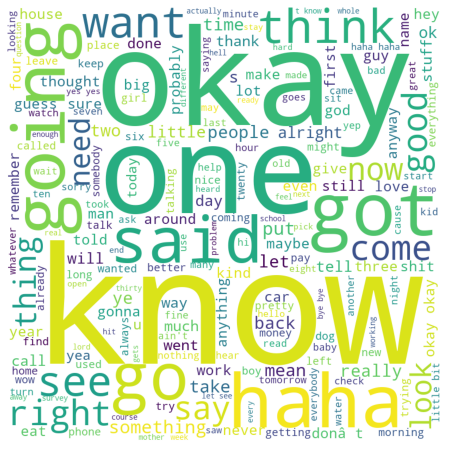

In [35]:
# https://towardsdatascience.com/how-to-make-word-clouds-in-python-that-dont-suck-86518cdcb61f
tf_idf.columns
data = tf_idf.transpose()
data.columns = ['highnar','lownar']   # 15,466 rows × 2 columns
wc = WordCloud(width=1000, height=800, background_color="black", stopwords=stopwords, 
               max_words=400, max_font_size=60, min_font_size=10, )
wc.generate_from_frequencies(data['highnar'])

plt.figure(figsize = (10, 8))
plt.imshow(wordcloud)
plt.axis("off")
# plt.tight_layout(pad = 0)
plt.show()